<a href="https://colab.research.google.com/github/jamslaugh/Data-Science-Projects/blob/main/distributed_hyperopt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP in banking - Topic Modeling:
This notebook has been created in order to display a parallelized version of Bayesian Search. Bayesian Search, in a nutshell, is a search algorythm that tries to minimize a given loss function of sort by tuning different hyperparameters.

Given the amount of hyperparameters a data scientist can face in it's everyday job, tuning an hyperparameters' space, that is the set of all possible values of all possible hyperparameters, can be a huge task, to say the least. 

In general a loss function for a given algorithm (classification, clustering, etc.) can vary according to the hyperparameters' values and its complexity can increase a lot as the number of hyperparameters grow.

Hyperopt is a well known library to optimize hyperparameter's space with **Bayesian Search**, but the time required to run a full optimization can grow exponentially with the amount of hyperparameters that have to be tuned.

Compared with other hyperparameter tuning algorithm, that is grid search and random search:

- **Grid Search** tries every possible combination of parameters you want to try in your model, this means it will take a lot of time to perform the entire search which can get very computationally expensive.

- **Random Search**, as the name suggests, tries random combinations of the values of the hyperparameters that are used to find the best solution for the built model. The drawback of Random Search is sometimes could miss important points(values) in the search space. In general, given the tradeoffs, it is more efficient than grid search.

- **Bayesian Search** uses a form of Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model. It can optimize a model with hundreds of parameters on a large scale.

In general, hyperopt has proven as being more efficient than grid search and more precise than random search. In particular, Bayesian optimization methods are efficient because they select hyperparameters in an informed manner. By prioritizing hyperparameters that appear more promising from past results, Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than both grid search and random search, meaning that the convergence time in Bayesian Search is lower than the one in random search.

## How does Bayesian Search works?

Bayesian Search works as follows:

- Hyperparameters are sampled from a random distribution, as in random search;
- They are used to optimize a loss function, as in random search;
- Different hyperparameters' space configuration are compared one to another, which makes Bayesian Seaerch more informed in choosing the right set of hyperparameters;
- A function to model the hyperparameters' space is generated and then optimized iteration after iteration.

This results in a better optimization with overall better computation times (see picture below)

![alt_text](https://miro.medium.com/max/700/1*sPTZiXuWHBct_kYiD_5aYA.jpeg)

# Why Spark?

Hyperopt has a single problem, it is very computationally intensive, even if more efficient than the other methods. Hyperopt is used, in production, at scale by leveraging on Spark clusters. This allows the parallel evaluation of multiple trials at once, gaining a lot in terms of runtime for huge datasets.

# Data Science Environment

Usually, hyperopt is used in a MLFlow environment, in order to track the different runs in a MLops environment.

# Sources

NLP in banking original source [Towards Data Science](https://towardsdatascience.com/clustering-sentence-embeddings-to-identify-intents-in-short-text-48d22d3bf02e)

Hyperopt introduction [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/09/alternative-hyperparameter-optimization-technique-you-need-to-know-hyperopt/)

Optimization methods comparison [Towards Data Science](https://towardsdatascience.com/hyperparameter-tuning-always-tune-your-models-7db7aeaf47e9)

Data Bricks docs [Data Bricks - Parallelize Hyperparameter Tuning](https://docs.databricks.com/applications/machine-learning/automl-hyperparam-tuning/hyperopt-spark-mlflow-integration.html)



# Installing Dependencies

## Installing Spark and Pyspark

![alt_text](https://media-exp1.licdn.com/dms/image/C4E12AQEb6oxAxtYD-Q/article-cover_image-shrink_600_2000/0/1620420835464?e=1654128000&v=beta&t=xFpPz8LoiI-boiQIgv09pG98Rli_nq2-ydkbbuK0AKE)

In [1]:
!wget https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

--2022-04-09 11:56:38--  https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300971569 (287M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop3.2.tgz’

spark-3.2.1-bin-had 100%[===================>] 287.03M   211MB/s    in 1.4s    

2022-04-09 11:56:40 (211 MB/s) - ‘spark-3.2.1-bin-hadoop3.2.tgz’ saved [300971569/300971569]



In [2]:
!apt-get install openjdk-8-jdk-headless > /dev/null

In [3]:
!ls -llah

total 288M
drwxr-xr-x 1 root root 4.0K Apr  9 11:56 .
drwxr-xr-x 1 root root 4.0K Apr  9 11:56 ..
drwxr-xr-x 4 root root 4.0K Mar 23 14:21 .config
drwxr-xr-x 1 root root 4.0K Mar 23 14:22 sample_data
-rw-r--r-- 1 root root 288M Jan 20 21:37 spark-3.2.1-bin-hadoop3.2.tgz


In [4]:
!pip install -q findspark

In [5]:
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [7]:
import findspark
findspark.init()

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
from pyspark.sql import functions as F
from pyspark.sql import types
import pyspark

In [9]:
!pip install --upgrade hyperopt
!pip install pynndescent

     |████████████████████████████████| 1.6 MB 4.7 MB/s 
     |████████████████████████████████| 199 kB 40.4 MB/s 
  Attempting uninstall: hyperopt
    Found existing installation: hyperopt 0.1.2
    Uninstalling hyperopt-0.1.2:
      Successfully uninstalled hyperopt-0.1.2


     |████████████████████████████████| 1.1 MB 5.3 MB/s 
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=f11ad63cf354c92316117dcf3f37dda7624fa8a1f1adc9535455c71801b710f0
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built pynndescent


## Installing Python Libraries

We proceed in installing Sentence Transformers, Umap and Hdbscan. For this version, we also need hyperopt 0.2.7 which supports Spark 3.0

In [11]:
%%bash
pip install -U sentence-transformers
pip install -U hdbscan
pip install -U umap-learn

  Using cached pynndescent-0.5.6-py3-none-any.whl
Found existing installation: pynndescent 0.5.6
Uninstalling pynndescent-0.5.6:
  Successfully uninstalled pynndescent-0.5.6


In [31]:
!pip install TBB

     |████████████████████████████████| 4.0 MB 5.0 MB/s 


# Working on data

We will use a mockup dataset, the banking_data in which there are only a series of different messages whith their intent. Our scope is to use hdbscan, umap and hyperopt together to find the best hyperparameter tuning in order to generate the best clusters. We will also create a custom loss function after a first run.

## Getting the Data

In [12]:
!wget https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/train.csv

--2022-04-09 12:02:10--  https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 839073 (819K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 819.41K  --.-KB/s    in 0.04s   

2022-04-09 12:02:10 (18.4 MB/s) - ‘train.csv’ saved [839073/839073]



## Importing packages

In [15]:
from hyperopt import hp, Trials, partial, fmin, tpe, STATUS_OK
import hyperopt
from umap import UMAP
import hdbscan
import pynndescent
import numpy as np

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
from sentence_transformers import SentenceTransformer
import pandas as pd
from pyspark.sql.functions import udf

## Defining Functions

In [17]:
def generate_clusters(message_embeddings,
                      n_neighbors,
                      n_components,
                      min_cluster_size,
                      random_state = None):
    """
    Generate HDBSCAN cluster object after reducing embedding dimensionality with UMAP
    """
    
    umap_embeddings = UMAP(n_neighbors=n_neighbors, 
                            n_components=n_components, 
                            metric='cosine', 
                            random_state=random_state).fit_transform(message_embeddings)

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(umap_embeddings)

    return clusters

In [18]:
def score_clusters(clusters, prob_threshold = 0.05):
    """
    Returns the label count and cost of a given cluster supplied from running hdbscan
    """
    
    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
    
    return label_count, cost

In [19]:
def objective(params, embeddings, label_lower, label_upper):
    """
    Objective function for hyperopt to minimize, which incorporates constraints
    on the number of clusters we want to identify
    """
    
    clusters = generate_clusters(embeddings, 
                                 n_neighbors = params['n_neighbors'], 
                                 n_components = params['n_components'], 
                                 min_cluster_size = params['min_cluster_size'],
                                 random_state = params['random_state'])
    
    label_count, cost = score_clusters(clusters, prob_threshold = 0.05)
    
    #15% penalty on the cost function if outside the desired range of groups
    if (label_count < label_lower) | (label_count > label_upper):
        penalty = 0.15 
    else:
        penalty = 0
    
    loss = cost + penalty
    
    return {'loss': loss, 'label_count': label_count, 'status': STATUS_OK}

In [30]:
def bayesian_search(embeddings, space, label_lower, label_upper, max_evals=100):
    """
    Perform bayseian search on hyperopt hyperparameter space to minimize objective function
    """
    
    trials = Trials()
    fmin_objective = partial(objective, embeddings=embeddings, label_lower=label_lower, label_upper=label_upper)
    best = fmin(fmin_objective, 
                space = space, 
                algo=tpe.suggest,
                max_evals=max_evals, 
                trials=hyperopt.SparkTrials())

    best_params = space_eval(space, best)
    print ('best:')
    print (best_params)
    print (f"label count: {trials.best_trial['result']['label_count']}")
    
    best_clusters = generate_clusters(embeddings, 
                                      n_neighbors = best_params['n_neighbors'], 
                                      n_components = best_params['n_components'], 
                                      min_cluster_size = best_params['min_cluster_size'],
                                      random_state = best_params['random_state'])
    
    return best_params, best_clusters, trials

## Loading Data Set

In [21]:
data_sample = spark.read.option("delimiter", ",").option("header", "true").csv('./train.csv')
slen = udf(lambda s: len(s), types.IntegerType())
data_sample = data_sample.withColumn('number_of_words',slen(F.split(data_sample.text," ")))

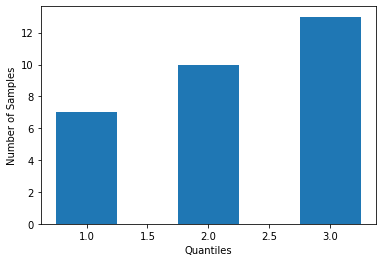

In [22]:
import matplotlib.pyplot as plt
quantiles = [0.25,0.5,0.75]
plt.subplots()
plt.bar([1,2,3],data_sample.approxQuantile('number_of_words',quantiles,0.04), width = 0.5)
plt.xlabel('Quantiles')
plt.ylabel('Number of Samples')
plt.show()

In [23]:
data_sample = data_sample.toPandas()
all_intents = list(data_sample['text'])

## Loading Sentence Transformers

In [24]:
# define the document embedding models to use for comparison
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model_use = hub.load(module_url)
model_st1 = SentenceTransformer('all-mpnet-base-v2')
model_st2 = SentenceTransformer('all-MiniLM-L6-v2')
model_st3 = SentenceTransformer('paraphrase-mpnet-base-v2')

def embed(model, model_type, sentences):
    """
    wrapper function for generating message embeddings
    """
  
    if model_type == 'use':
        embeddings = model(sentences)
    elif model_type == 'sentence transformer':
        embeddings = model.encode(sentences)

    return embeddings

# generate embeddings for each model
embeddings_use = embed(model_use, 'use', all_intents)
embeddings_st1 = embed(model_st1, 'sentence transformer', all_intents)
embeddings_st2 = embed(model_st2, 'sentence transformer', all_intents)
embeddings_st3 = embed(model_st3, 'sentence transformer', all_intents)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/594 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [25]:
pynndescent.__version__

'0.5.6'

In [ ]:
import collections
# Fix for UMAP to work! Numba gives some issues here
collections.namedtuple("n", [], module=__name__)
pynndescent.rp_trees.FlatTree.__module__  = "pynndescent.rp_trees" 

hspace = {
    "n_neighbors": hp.choice('n_neighbors', range(3,16)),
    "n_components": hp.choice('n_components', range(3,16)),
    "min_cluster_size": hp.choice('min_cluster_size', range(2,16)),
    "min_samples": None,
    "random_state": 42
}

label_lower = 30
label_upper = 100
max_evals = 30

bayesian_search(embeddings_st1,
                space=hspace,
                label_lower=label_lower, 
                label_upper=label_upper, 
                max_evals=max_evals)

In [27]:
best_params = {
    "n_neighbors": 16,
    "n_components": 8,
    "min_cluster_size": 4,
    "min_samples": 3,
    "random_state": 42
}

In [29]:
best_clusters = generate_clusters(embeddings_st1, 
                                      n_neighbors = best_params['n_neighbors'], 
                                      n_components = best_params['n_components'], 
                                      min_cluster_size = best_params['min_cluster_size'],
                                      random_state = best_params['random_state'])

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
